# Assignment 1.1

### Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook

> What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

In random networks all nodes have relatively same degree, in real networks there are outliers

> List the four regimes that characterize random networks as a function of $\langle k \rangle$.

k < 1 -> Subcritical
k = 1 -> Critical Point
1 < k < ln N -> Supercritical Regime
k > ln N -> Connected Regime

> According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?

In real networks the clustering coefficient stays the same

### WS edition

> First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one. 

In [1]:
# Imports
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [4]:
G_ws_01 = nx.watts_strogatz_graph(500, 4, 0.0)
G_ws_02 = nx.watts_strogatz_graph(500, 4, 0.1)
G_ws_03 = nx.watts_strogatz_graph(500, 4, 1.0)

print(nx.average_shortest_path_length(G_ws_01))
print(nx.average_shortest_path_length(G_ws_02))
print(nx.average_shortest_path_length(G_ws_03))

62.875751503006015
7.5990140280561125
4.714693386773547


> Describe what happens to the network when $p = 1$.

With $p = 1$ we are close to the average degree

> Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.

In [7]:
# Generate random network with the Barabasi-Albert model from Week 3
bG = nx.Graph()

bG.add_edge(1,2)

for _ in range(500):
    temp_edge_flattened = np.array(bG.edges).flatten().tolist()
    
    bG.add_edge(rd.choice(temp_edge_flattened), max(temp_edge_flattened) + 1)

average_path_length_rd = nx.average_shortest_path_length(bG)

average_path_length_ws = nx.average_shortest_path_length(G_ws_01)

current_p = 0.0

while(average_path_length_rd < average_path_length_ws):
    current_p += 0.005

    temp_G = nx.watts_strogatz_graph(500, 4, current_p)

    average_path_length_ws = nx.average_shortest_path_length(temp_G)

print("For p = " + str(current_p) + " the average path length of the graph is " + str(average_path_length_ws) + " which is close to the average path length of a random graph which is " + str(average_path_length_rd))

For p = 0.28000000000000014 the average path length of the graph is 5.550028056112224 which is close to the average path length of a random graph which is 5.585227950473555


> Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring.
> Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

In [15]:
# Calculate path lengths and standard deviation

ps = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

mean_paths = []
std_paths = []

for p in ps:
    path_lengths = []
    for _ in range(50):
        G = nx.watts_strogatz_graph(500, 4, p)
        d = nx.average_shortest_path_length(G)
        path_lengths.append(d)
    mean_paths.append(np.mean(path_lengths))
    std_paths.append(np.std(path_lengths))

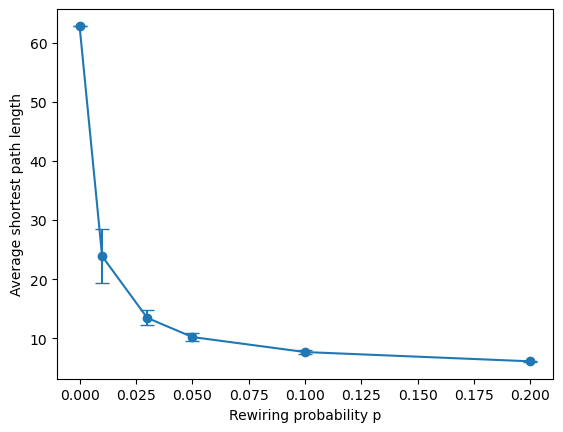

In [18]:
# Make plot

plt.errorbar(ps, mean_paths, yerr=std_paths, fmt='-o', capsize=5)
plt.xlabel('Rewiring probability p')
plt.ylabel('Average shortest path length')
plt.show()

The figure above shows the Small-world effect with a practical example. The x-axis shows the rewiring probabiltiy for the watts-strogatz graph and the y-axis the average path length of the resulting graph. The Watts-Strogatz graph was generated with 500 nodes and a degree of 4. The graph shows that the average path length drastically decreases even with a small rewiring possiblity. When the rewiring possiblity gets larger the effect decreases. Also interesting is that the standard derivation is very big for rewiring possiblity 0.01 and decreases with bigger p.

### BA-Edition

> What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).

ToDo

> What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.

ToDo

> We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`.

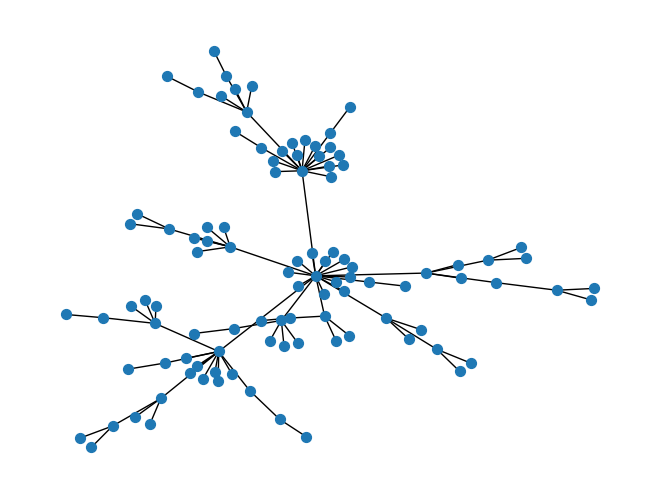

In [21]:
bG = nx.Graph()

# First create a graph consisting of a single link
bG.add_edge(1,2)

# Then add others nodes, connecting one of the existing nodes in proportion to their degree
for _ in range(100):
    temp_edge_flattened = np.array(bG.edges).flatten().tolist()
    
    bG.add_edge(rd.choice(temp_edge_flattened), max(temp_edge_flattened) + 1)

# Plot the network
nx.draw(bG, node_size = 50)

In [22]:
# Add more nodes until you have a 5000 node network
for _ in range(5000 - 102):
    temp_edge_flattened = np.array(bG.edges).flatten().tolist()    
    bG.add_edge(rd.choice(temp_edge_flattened), max(temp_edge_flattened) + 1)

In [23]:
# What's the maximum and minimum degree?
degree_sequence = [d for (_, d) in bG.degree()]

min_degree = min(degree_sequence)
max_degree = max(degree_sequence)

print(min_degree, max_degree)

1 166


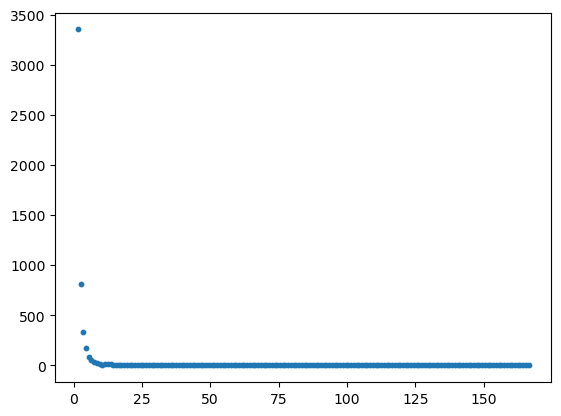

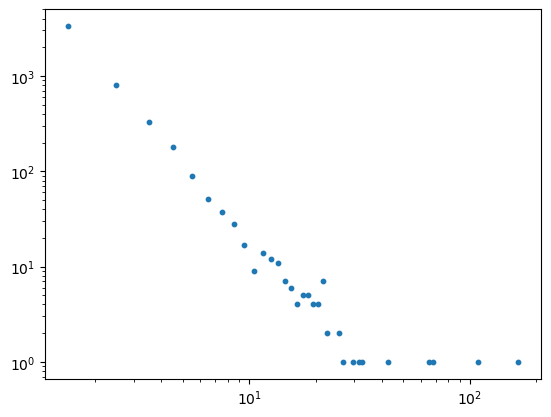

In [24]:
# Now, bin the degree distribution using `numpy.histogram`.

counts, bins = np.histogram(degree_sequence, bins = (range(min_degree, max_degree+2)))

bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Plot the distribution. Plot it with both linear and log-log axes.

plt.scatter(x = bin_centers, y = counts, s = 10)
plt.show()

plt.scatter(x = bin_centers, y = counts, s = 10)
plt.xscale("log")
plt.yscale("log")
plt.show()

# Assignment 1.2: Stats and visualization of the Rock Music Network

> * Document how you crawled the network.
>    * First, simply describe the steps of the process (what you did, step by step)

In [1]:
# Imports 

import networkx as nx
import matplotlib.pyplot as plt
import os
import re

First read all the downloaded files, add them as nodes with where the name of the node is the name of the file (without the .txt) and the length of content is the length of the file content without whitespaces

In [2]:
G = nx.DiGraph()

files = os.listdir("Musicians")

for file in files:
    filepath = "Musicians/" + file
    with open(filepath, "r") as f:
        G.add_node(file.replace(".txt", ''), length_of_content = len(f.read().split()))

Then read all the files again, extract the links, and if the link exist in the nodes (name without / because that didn't work with naming the files) add an edge

In [3]:
for file in files:
    filepath = "Musicians/" + file
    with open(filepath, "r") as f:
        filecontent = f.read()

        links = re.findall(r'\[\[([^|\]#]+)(?:#[^\]]*)?(?:\|([^\]]+))?\]\]', filecontent)

        for link, _ in links:
            if link.replace('/', ' ') in list(G.nodes):
                G.add_edge(file.replace(".txt", ''), link.replace('/', ' '))

Remove all nodes without any connection

In [ ]:
no_connections = [node for node in G.nodes if (G.out_degree(node) == 0 and G.in_degree(node) == 0)]

G.remove_nodes_from(no_connections)

Get the largest weakly connected component (for our data GL = G)

In [7]:
largest = max(nx.weakly_connected_components(G), key=len)

GL = G.subgraph(largest)

>    * Then, write a short section about which part of the process that was most difficult

ToDo

>    * Next write a short section about how you used LLMs to help you

Didn't really use LLMs but the regular expression for the wikipdia links is from https://regex101.com/r/5R0WQ1/1

>    * Finally, compose a short section about what you would do differently if you had to do it again

ToDo

## Simple network statistics and analysis

> What is the number of nodes in the network? 

In [8]:
n_nodes = len(list(GL.nodes))

print("The number of nodes is " + str(n_nodes))

The number of nodes is 484


In [9]:
n_edges = len(list(GL.edges))

print("The number of edges is " + str(n_edges))

The number of edges is 7576


> Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?

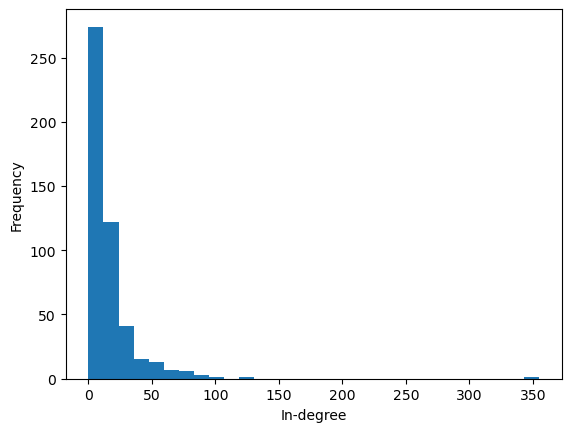

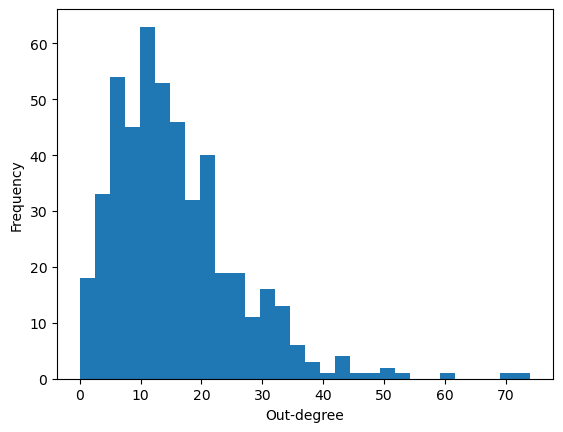

In [11]:
in_degree_sequence = sorted([d for d in GL.in_degree()], key = (lambda x: x[1]))
out_degree_sequence = sorted([d for d in GL.out_degree()], key = (lambda x: x[1]))

number_bins = 30

plt.hist([x[1] for x in in_degree_sequence], bins=number_bins)
plt.xlabel("In-degree")
plt.ylabel("Frequency")
plt.show()

plt.hist([x[1] for x in out_degree_sequence], bins=number_bins)
plt.xlabel("Out-degree")
plt.ylabel("Frequency")
plt.show()

Most musicians have an in-degree 0 or a very small one, and a few musicians have a very high in-degree. The out-degree is more of a normal distribution with a mean around 12. This is probably due to the fact that many musicians get inspiration from a very small group of very influational musicians. 

> Compare the out-degree distribution to a *random network* with the same number of nodes and links.

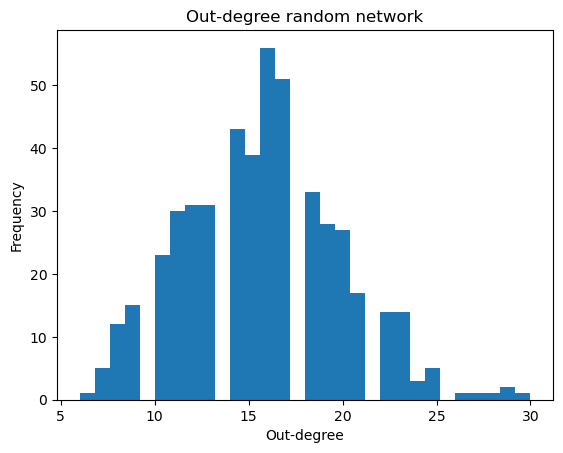

In [12]:
rG = nx.gnm_random_graph(n_nodes, n_edges, directed=True)

out_degree_sequence_rG = sorted([d for d in rG.out_degree()], key = (lambda x: x[1]), reverse=True)

plt.hist([x[1] for x in out_degree_sequence_rG], bins=number_bins)
plt.xlabel("Out-degree")
plt.ylabel("Frequency")
plt.title("Out-degree random network")
plt.show()

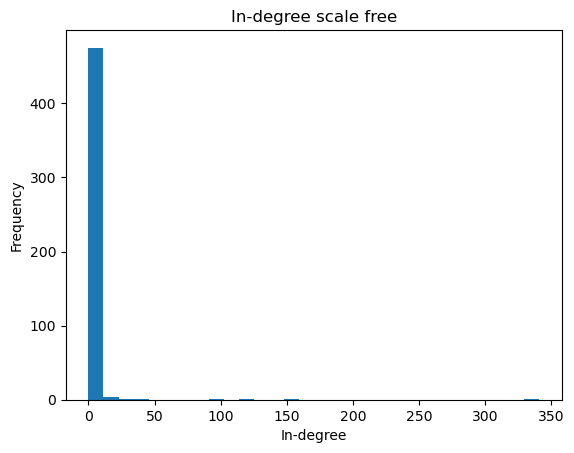

In [14]:
G_sf = nx.scale_free_graph(n_nodes)

in_degree_sequence_sf = sorted([d for d in G_sf.in_degree()], key = (lambda x: x[1]), reverse=True)

plt.hist([x[1] for x in in_degree_sequence_sf], bins=number_bins)
plt.xlabel("In-degree")
plt.ylabel("Frequency")
plt.title("In-degree scale free")
plt.show()

> Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?

In [16]:
print("The musicians with the hightest in-degree are:")
print(in_degree_sequence[-5:])

The musicians with the hightest in-degree are:
[('Metallica', 85), ('Queen (band)', 88), ('Bob Dylan', 95), ('Led Zeppelin', 119), ('AllMusic', 355)]


In [17]:
print("The musicians with the hightest out-degree are:")
print(out_degree_sequence[-5:])

The musicians with the hightest out-degree are:
[("Guns N' Roses", 51), ('Def Leppard', 52), ('Black Sabbath', 60), ('Deep Purple', 71), ('Alice in Chains', 74)]


ToDo: filter all music out, maybe more

> What are the 10 pages with the longest wiki entries? (use the `length of content` attribute to figure this one out)?

In [18]:
sorted_length = sorted(list(GL.nodes(data=True)), key= lambda x: x[1]['length_of_content'])

print(sorted_length[-10:])

[('Marilyn Manson (band)', {'length_of_content': 24155}), ('The Beach Boys', {'length_of_content': 24280}), ('David Bowie', {'length_of_content': 24400}), ('Elton John', {'length_of_content': 24413}), ('U2', {'length_of_content': 24516}), ('The Rolling Stones', {'length_of_content': 25717}), ('Paul McCartney', {'length_of_content': 26365}), ('Queen (band)', {'length_of_content': 26776}), ("Guns N' Roses", {'length_of_content': 29303}), ('Bob Dylan', {'length_of_content': 30154})]


### Visualizing the networks

> Let's build a simple visualization of the network*

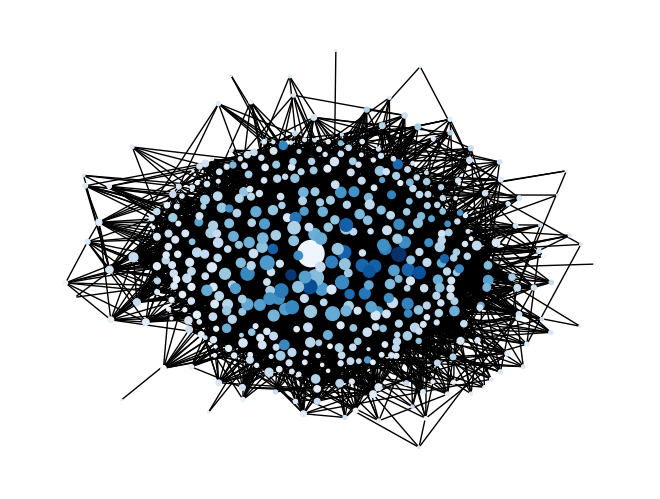

In [19]:
G_und = GL.to_undirected() 

node_sizes = [dict(G_und.degree())[n] for n in G_und.nodes()]

node_colors = [G_und.nodes[n]['length_of_content'] for n in G_und.nodes()]

nx.draw_kamada_kawai(G_und, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Blues)